In [71]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
dataset = pd.read_csv('telco.csv')

In [8]:
dataset.describe(include=[np.object])


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,1346-PJWTK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [9]:
dataset['TotalCharges']=dataset['TotalCharges'].convert_objects(convert_numeric=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [11]:
dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean(), inplace=True)

In [14]:
dataset.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


In [15]:
df=dataset.copy()

In [16]:
unwantedcolumnlist=["customerID","TotalCharges"]


In [17]:
df = df.drop(unwantedcolumnlist, axis=1)

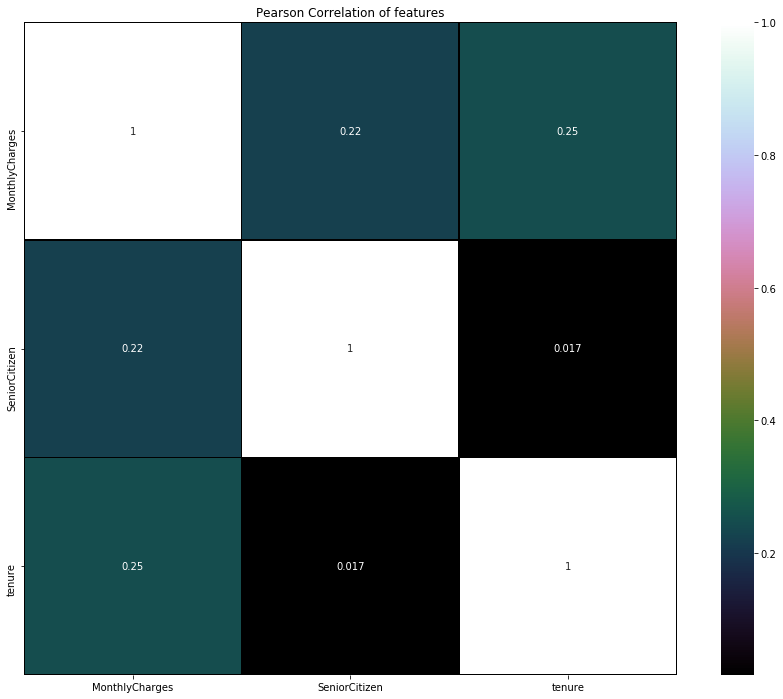

In [72]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list) 
# Create Dataframe containing only numerical features
df_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [18]:
data_dummy=pd.get_dummies(df,drop_first=True)

In [19]:

len(data_dummy.columns)

30

In [20]:
data_dummy.head(5)

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [27]:
X = data_dummy.iloc[:, 0:19].values
y = data_dummy.iloc[:, 18].values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [52]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [53]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [54]:
from sklearn  import ensemble
adaboost =ensemble.AdaBoostClassifier()
adaboost.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [55]:
from sklearn  import ensemble
gboost =ensemble.GradientBoostingClassifier()
gboost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [56]:
from sklearn.svm import SVC
svc_cl = SVC(kernel = 'rbf', random_state = 0)
svc_cl.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [58]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state = 0)
logistic_reg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)


from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)


GaussianNB(priors=None)

In [66]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_xgb = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_xgb.mean()
acc_adb = cross_val_score(estimator = adaboost, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_adb.mean()


acc_gbbost = cross_val_score(estimator = gboost, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_gbbost.mean()

acc_dec1 = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_dec1.mean()

acc_gaussion1 = cross_val_score(estimator = gaussian, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_gaussion1.mean()

acc_knn1 = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_knn1.mean()

acc_random1 = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_random1.mean()

acc_log_reg1 = cross_val_score(estimator = logistic_reg, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_log_reg1.mean()

acc_sgd1 = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_sgd1.mean()

acc_svc1 = cross_val_score(estimator = svc_cl, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_svc1.mean()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

1.0

In [67]:
models_cross = pd.DataFrame({
    'Model': ['XG Boost','AdaBoost','GradientBoosting','Support Vector Machines','Stochastic Gradient Decent','Logistic Regression', 
              'Random Forest','Decision Tree', 'Guassian Naive Bayes', 'Kneighbours'],
    'Score': [acc_xgb.mean(),acc_adb.mean(),acc_gbbost.mean(),acc_svc1.mean(),acc_sgd1.mean(), acc_log_reg1.mean(), 
              acc_random1.mean(),acc_dec1.mean(), acc_gaussion1.mean(), acc_knn1.mean()]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score
0,XG Boost,1.000000
1,AdaBoost,1.000000
2,GradientBoosting,1.000000
3,Support Vector Machines,1.000000
4,Stochastic Gradient Decent,1.000000
5,Logistic Regression,1.000000
6,Random Forest,1.000000
7,Decision Tree,1.000000
8,Guassian Naive Bayes,1.000000
9,Kneighbours,0.999189


In [68]:
y_pred = svc_cl.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [69]:
cm

array([[1480,    0],
       [   0,  633]], dtype=int64)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18'] ['f0', 'f1']
expected f11, f7, f15, f18, f2, f6, f16, f17, f5, f4, f13, f9, f14, f10, f3, f8, f12 in input data

In [74]:
acc_xgb = cross_val_score(estimator = xgb_classifier, X = X_test, y = y_test, cv = kfold,scoring=scoring)
acc_xgb.mean()*100

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

100.0